In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(project_root)

print(project_root)

importmachine_learning.files_lib as FL
importmachine_learning.ml_lib as ML
import data_preprocessing.utils as utils
from data_extractor.data_extractor import load_df, extract_X_y_from_df 
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import json

/Users/gsk/documents/neuron/lie-detector-ai


In [3]:
df = load_df("../../data/")
# Filter the data and add the column 'label' depends what you need
df = df.query("desired_answer == answer and data_type in ['REAL', 'FAKE']")
df['label'] = df.apply(lambda x: 1 if x.block_no in [1,3] else 0, axis = 1)
df.head()

Opening raw data file ../../data/1299BF1A/EEG_ExperimentBlock.HONEST_RESPONSE_TO_TRUE_IDENTITY_raw.fif...
    Range : 0 ... 70174 =      0.000 ...   280.696 secs
Ready.
Reading 0 ... 70174  =      0.000 ...   280.696 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass,

,subject,block_no,duration,field,data_type,answer,eeg,desired_answer,label
1,1299BF1A,1,0.840,BIRTH_DATE,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1
2,1299BF1A,1,0.744,HOMETOWN,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1
3,1299BF1A,1,0.676,HOMETOWN,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1
4,1299BF1A,1,0.620,HOMETOWN,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1
6,1299BF1A,1,0.652,NAME,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1


In [4]:
X,y = extract_X_y_from_df(df)

Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()


Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data(

Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()


Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()


0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using dat

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data(

0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using dat

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data(

Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data(

Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

In [8]:
# TODO play with frequencies and bands with data and manually check what wasn't checked in below's param grid. Check 0.5 to 1. Check if theres a tendency in learning.

param_grid = {
    'classifier__n_estimators': [ 200, 300 ],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [5, 10],
    'classifier__max_features': ['sqrt'],
    'classifier__bootstrap': [True, False],
    'classifier__class_weight': [None, 'balanced']
}

result_folder = "../results/random_forest/"


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   1.4s
[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   1.6s
[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   1.7s
[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   1.7s
[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=10, classifier__max_

AttributeError: module 'datetime' has no attribute 'now'

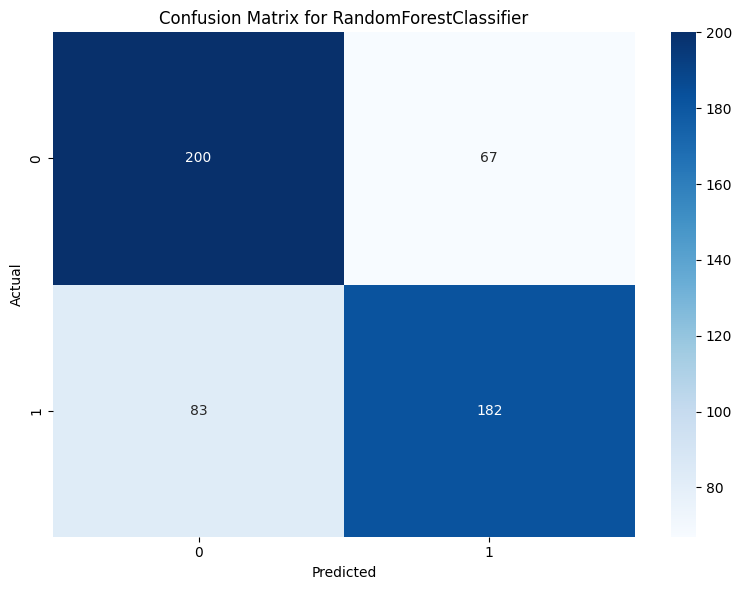

In [9]:
best_model, best_params, test_score = ML.grid_search_random_forest_eeg_2(
    X, y, param_grid, test_size=0.2, cv=5, scoring='accuracy'
)

Best Parameters:
{'classifier__bootstrap': False, 'classifier__class_weight': None, 'classifier__max_depth': 20, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300}

Best Cross-Validation Score: 0.7528
Test Score: 0.7180



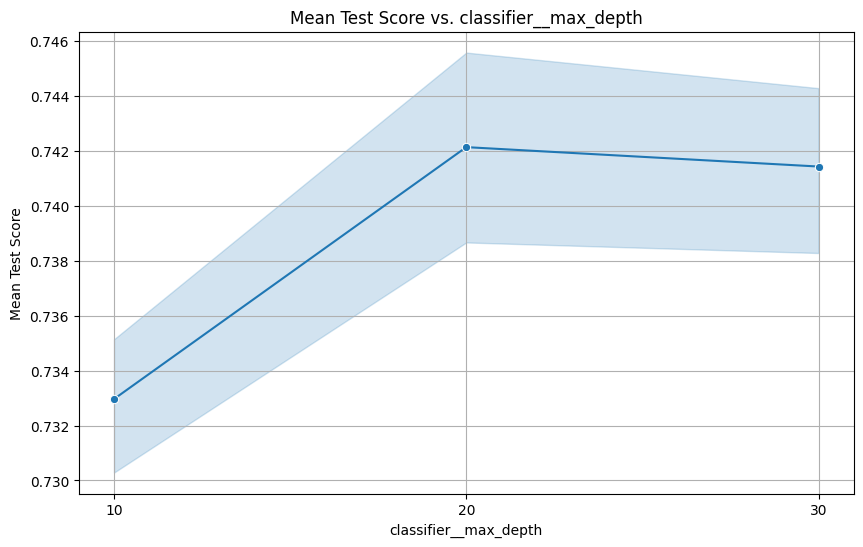

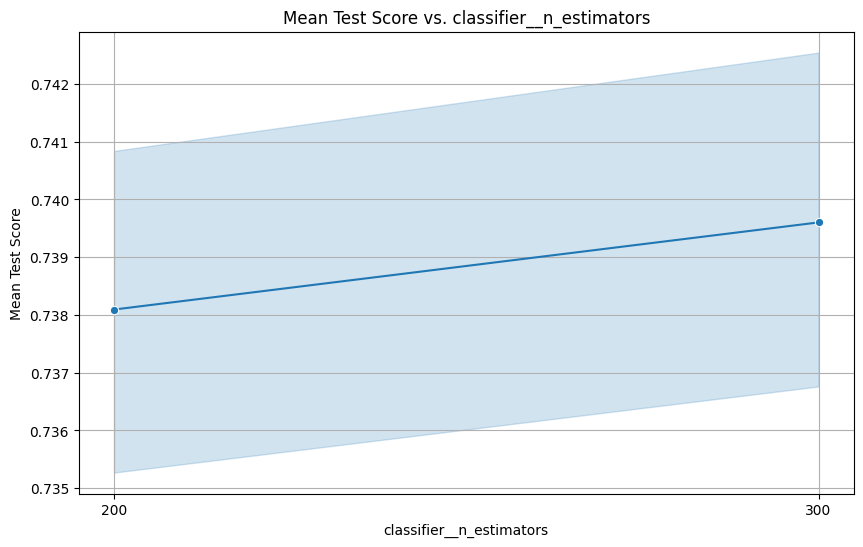

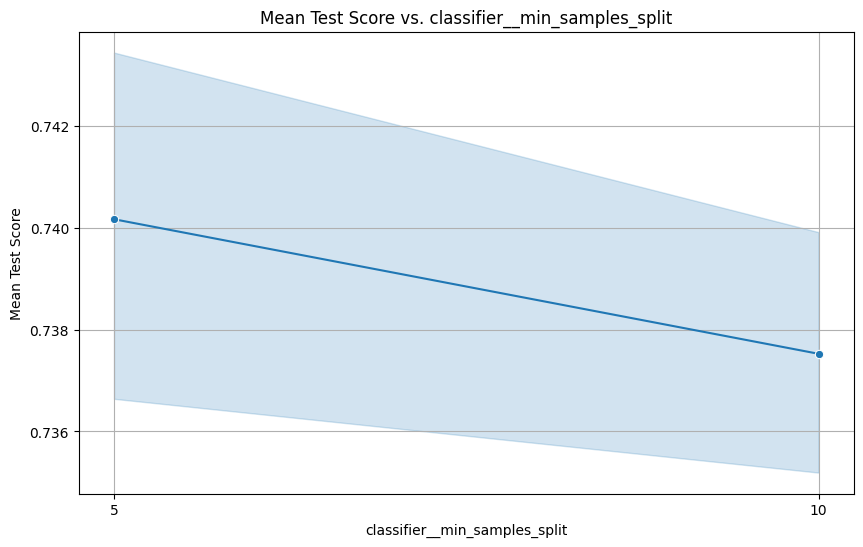

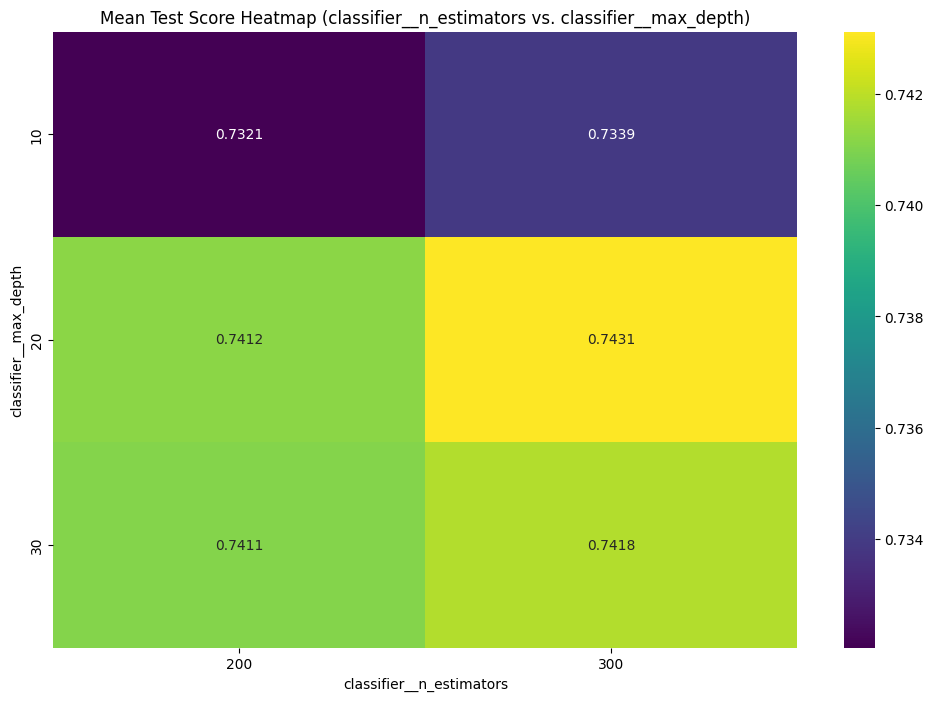

Classification Report:

Class 0:
  precision: 0.7067
  recall: 0.7491
  f1-score: 0.7273
  support: 267.0000

Class 1:
  precision: 0.7309
  recall: 0.6868
  f1-score: 0.7082
  support: 265.0000

macro avg:
  precision: 0.7188
  recall: 0.7179
  f1-score: 0.7177
  support: 532.0000

weighted avg:
  precision: 0.7188
  recall: 0.7180
  f1-score: 0.7178
  support: 532.0000


In [10]:
importmachine_learning.visualisation_lib as VL

# file_path = f"../results/random_forest_eeg_20240930_224506/result_RandomForestClassifier_grid_search_random_forest_eeg_5fold_{datetime.now().strftime('%Y-%m-%d_%H:%M:%S_%f')}.json"
file_path = "/Users/gsk/documents/neuron/lie-detector-ai/gs/results/random_forest_eeg_2024-10-28_20:46:55/result_RandomForestClassifier_grid_search_random_forest_eeg_2_5fold_1730145448.json"
cv_results_df, best_params, best_score, test_score, classification_report = FL.read_grid_search_results(file_path)

print("Best Parameters:")
print(best_params)
print(f"\nBest Cross-Validation Score: {best_score:.4f}")
print(f"Test Score: {test_score:.4f}\n")

VL.plot_mean_test_scores(cv_results_df, 'classifier__max_depth')
VL.plot_mean_test_scores(cv_results_df, 'classifier__n_estimators')
VL.plot_mean_test_scores(cv_results_df, 'classifier__min_samples_split')

VL.plot_heatmap_mean_test_scores(cv_results_df, 'classifier__n_estimators', 'classifier__max_depth')

# VL.plot_fit_and_score_times(cv_results_df, 'classifier__n_estimators')

if classification_report:
    print("Classification Report:")
    for label, metrics in classification_report.items():
        if isinstance(metrics, dict):
            if label in ['accuracy', 'macro avg', 'weighted avg']:
                print(f"\n{label}:")
                for metric_name, metric_value in metrics.items():
                    print(f"  {metric_name}: {metric_value:.4f}")
            else:
                print(f"\nClass {label}:")
                for metric_name, metric_value in metrics.items():
                    print(f"  {metric_name}: {metric_value:.4f}")


In [13]:
# TODO play with frequencies and bands with data and manually check what wasn't checked in below's param grid. Check 0.5 to 1. Check if theres a tendency in learning.

param_grid = {
    'classifier__n_estimators': [ 200, 300 ],
    'classifier__max_depth': [20, 30],
    'classifier__min_samples_split': [2, 5],
    'classifier__max_features': ['sqrt'],
    'classifier__bootstrap': [True, False],
    'classifier__class_weight': [None, 'balanced']
}

result_folder = "../results/random_forest/"


Fitting 5 folds for each of 32 candidates, totalling 160 fits


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  22.4s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  22.5s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  22.8s
[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  23.0s
[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  22.8s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  23.8s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  24.0s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  24.3s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  24.1s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  24.7s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  24.8s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  26.0s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  25.7s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  24.6s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  24.5s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  26.0s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  25.4s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  27.2s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  25.5s
[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  26.5s
[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  27.3s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  27.6s
[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  27.4s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  26.1s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  31.6s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  31.7s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  33.3s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  33.0s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  33.4s
[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  33.5s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  33.3s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  32.8s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  38.3s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  37.7s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  37.6s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  39.6s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  39.4s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  39.7s
[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  39.3s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  38.8s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  34.2s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  34.5s
[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  34.7s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  34.4s
[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  34.1s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  36.4s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  36.5s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  36.8s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  36.6s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  34.9s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  37.0s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  35.2s
[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  35.1s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  35.7s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  35.5s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  37.9s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  36.4s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  37.3s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  35.1s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  36.7s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  36.7s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  34.9s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  35.0s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  35.2s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  35.2s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  37.2s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  37.4s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  37.7s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  35.9s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  38.0s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  38.1s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  36.9s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  36.5s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  36.2s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  35.8s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  37.9s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  38.2s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  38.1s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  37.8s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  37.8s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  37.1s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  39.6s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  39.9s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  39.8s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  39.9s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  43.4s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  44.0s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  46.0s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  43.3s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  40.0s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  43.0s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  40.5s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  40.4s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  40.6s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  41.3s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  44.9s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  43.8s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  43.0s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  39.1s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  43.1s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  42.5s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  39.1s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  38.9s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  38.8s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  39.9s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  42.8s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  43.8s
[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  43.7s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  40.0s
[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  43.5s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  43.2s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  41.9s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  38.9s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  38.2s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  38.3s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  42.0s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  41.7s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  41.8s
[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  42.2s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  41.7s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  39.0s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  40.1s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  40.3s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  40.9s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  41.7s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  43.7s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  44.2s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  46.2s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  39.6s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  36.9s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  40.1s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  37.0s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  37.1s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  36.4s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  36.5s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  38.3s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  44.2s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  44.7s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  44.6s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  44.7s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  43.0s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  42.9s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  43.7s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  41.7s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  37.9s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  41.2s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  41.5s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  37.5s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  41.2s
[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  42.1s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=2, classifier__n_estimators=300; total time=  40.9s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  38.6s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  37.6s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  37.2s
[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  37.2s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  39.8s
[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  40.3s
[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  40.3s
[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  39.9s
[CV] END classifier__bootstrap=False, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_sample

/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Results saved to ../results/random_forest_eeg_2024-10-28_21:19:03/result_RandomForestClassifier_grid_search_random_forest_eeg_5fold_1730148005.json
Model saved to ../results/random_forest_eeg_2024-10-28_21:19:03/RandomForestClassifier_best_model_1730148005.joblib


AttributeError: module 'datetime' has no attribute 'now'

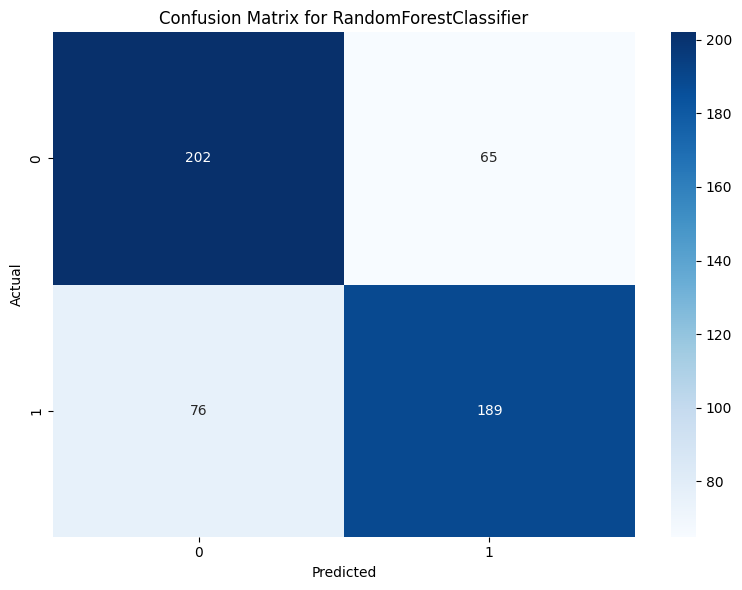

In [14]:
best_model, best_params, test_score = ML.grid_search_random_forest_eeg(
    X, y, param_grid, test_size=0.2, cv=5, scoring='accuracy'
)